## **PART I- Business Understanding**

In this project we will explore a data set of domestic flights in India containing information on domestic flights in India from March to June 2019. Flight ticket prices can vary depending on demand, itinerary, departure / landing hours and even date. That is, their price is unpredictable and can change at any given moment. The aim is to analyze the attached data set and to understand what are the most influential factors on the flight prices within India and find similar features for different flights.

There are two business questions for the above data set:
Question 1: Is it possible to predict or estimate the flight price of a domestic flight in India based on route, airline
Or date?
Question 2: To how many groups can the flights be divided so that each group will have flights that are similar to each other
(In terms of airline, route, etc.)?

The first question is a SMART question because all of the following reasons:

*   Specific= The question is spesific beacause it guides us to evaluate the price by using specific parameters.
*   Measurable= Price is a measurable value and it can be quantify evaluate and predicted.
*   Assingable= At first we all read the buisness qusetions and explained why it is a data driven qusetions. Than we assigned each group member his own part. Nizan did the preperation part ,Bar did the modeling part and Tomer did the evaluation and final report .
*   Realistic- This is a supervized problem ,the values are real and that make it possible to obtain full transparency regarding the influence of certain values on flight prices.
*   Time-related- We had one month to work on this project . On the first week we repeated on the material, and then we start working on Business Understanding and Data Understanding , than we analyzed the data. The week after we went on to Data Preparation by analyzing the  basic statistical research, distributions and seperated of values. The week after we worked on modeling by representing the Clustering and classification models and evalueted the findings. At last we did the final report.


The second question is a SMART question because all of the following reasons:

*   Specific= The question is spesific beacause it guides us to separate the flights to clusters by specific instruction.
*   Measurable= It is a quantitative question beacuse we need to devied the data into groups and analyze them .
*   Assingable= At first we all read the buisness qusetions and explained why it is a data driven qusetions. Than we assigned each group member his own part. Nizan did the preperation part ,Bar did the modeling part and Tomer did the evaluation and final report .
*   Realistic- This is a supervized problem ,the values are real and that make it possible to obtain full transparency regarding the influence of certain values on flight prices.
*   Time-related- We had one month to work on this project . On the first week we repeated on the material, and then we start working on Business Understanding and Data Understanding , than we analyzed the data. The week after we went on to Data Preparation by analyzing the  basic statistical research, distributions and seperated of values. The week after we worked on modeling by representing the Clustering and classification models and evalueted the findings. At last we did the final report.



In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt 
from sklearn import metrics
from sklearn.metrics import silhouette_score
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
from sklearn import tree
from sklearn.datasets import make_blobs
from sklearn import linear_model
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
plt.style.use("ggplot")


In [ ]:
try:
    data = pd.read_csv('flights12.csv')
    print("Data is ready.")
except:
    print("Cannot read file.")

Data is ready.


## **PART II- Data Understanding**

The first and second questions can be analyzed according to the data driven approach because our data set contains the data on which the question is asked about.

For example in the first question we need to predict the price of a flight according to data of route, airline and date. In the data set we can find information about route, airline and date and the price for each row. Accordingly it will be possible to predict the price of the flight based on this data.
First we checked if there was any problem reading and analyzing the data, if there where any duplicates,any missing values and such ,accordingly we changed the data so it will fit the required model.
we will use the Classification model using Random-Forest to predict the price.

In the second question we need to find the amount of groups that need to be divided according to the given data of airlines, route and more. With this data it will be possible to run models that will divide the groups correctly according to the exist data. The required model is Clustering, using k-means model to understand how many clusters is needed for best adjustment.

In [ ]:
data.head()

,Airline,Date,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,"BLR , DEL",22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,"CCU , IXR , BBI , BLR",05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,"DEL , LKO , BOM , COK",09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,"CCU , NAG , BLR",18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,"BLR , NAG , DEL",16:50,21:35,4h 45m,1 stop,No info,13302.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13354 entries, 0 to 13353
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date             13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            13354 non-null  float64
dtypes: float64(1), object(10)
memory usage: 1.1+ MB


In [ ]:
data.describe()

,Price
count,13354.000000
mean,8190.637282
std,4648.401101
min,3.065912
25%,4804.000000
50%,7308.000000
75%,11087.000000
max,79512.000000


In [ ]:
print('Number of rows:', data.shape[0], 'Number of columns:',data.shape[1])

Number of rows: 13354 Number of columns: 11


In [ ]:
data['Airline'] = data['Airline'].replace({'Jet Airways Business': 'Jet Airways' , 'Vistara Premium economy':'Vistara' , 'Multiple carriers Premium economy':'Multiple carriers'})
data['Additional_Info'] = data['Additional_Info'].replace({'No Info': 'No info'})
data['Destination'] = data['Destination'].replace({'New Delhi': 'Delhi'})

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

Text(0.5, 1.0, 'Total Stops')

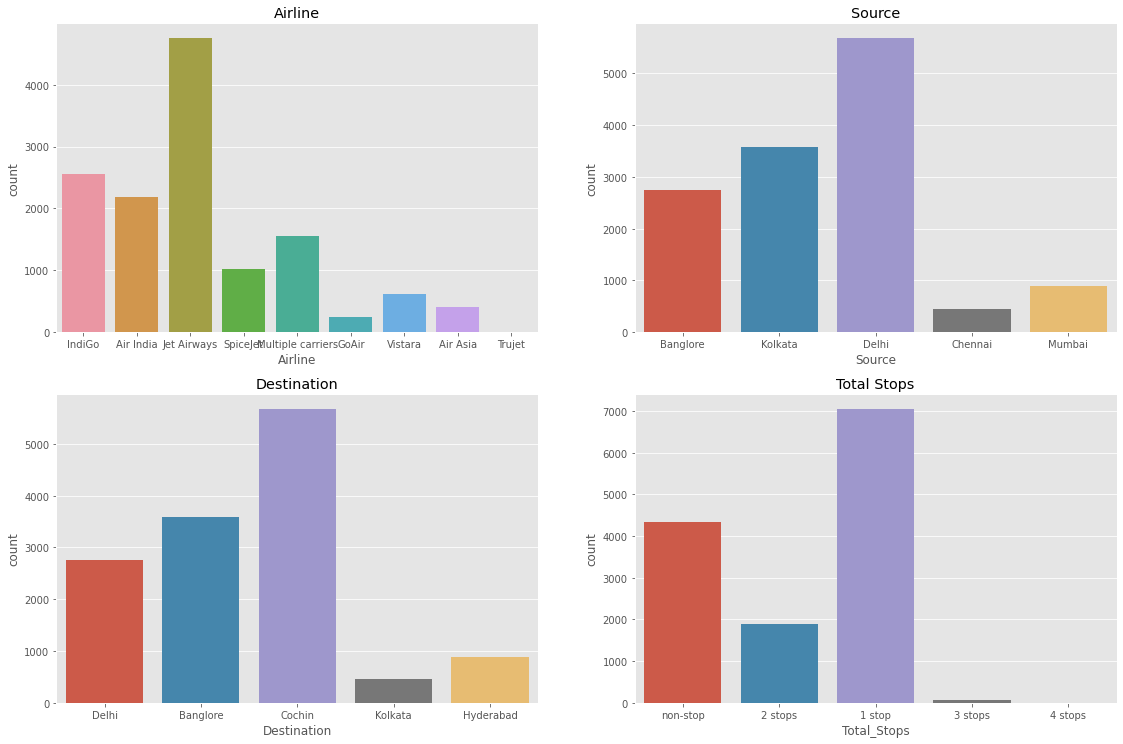

In [ ]:
fig=plt.figure(figsize=(19,12.5))
fig.add_subplot(2,2,1)
sns.countplot(data["Airline"])
plt.title("Airline")

fig.add_subplot(2,2,2)
sns.countplot(data["Source"])
plt.title("Source")

fig.add_subplot(2,2,3)
sns.countplot(data["Destination"])
plt.title("Destination")

fig.add_subplot(2,2,4)
sns.countplot(data["Total_Stops"])
plt.title("Total Stops")


Conclusion- 

*   According to the first graph the airline that has the most number of flights is Jet-airways , and Trujet is the least.
*   According to the second graph , most flight depart from Delhi Airport .
*   According to the third graph most flight land in Chochin Airport, and least of them land in Kolkata.
*   According to the 4th graph most flights have one stop route.






## **PART III -EDA + Data Preparation**

In [ ]:
data.loc[data['Price'].idxmax()]

Airline                Jet Airways
Date                    01/03/2019
Source                    Banglore
Destination                  Delhi
Route              BLR , BOM , DEL
Dep_Time                     05:45
Arrival_Time                 11:25
Duration                    5h 40m
Total_Stops                 1 stop
Additional_Info     Business class
Price                        79512
Name: 2924, dtype: object

In [ ]:
data.loc[data['Price'].idxmin()]

Airline                        Air India
Date                          24/05/2019
Source                           Kolkata
Destination                     Banglore
Route              CCU , GAU , DEL , BLR
Dep_Time                           09:50
Arrival_Time                08:55 25 May
Duration                          23h 5m
Total_Stops                      2 stops
Additional_Info                  No info
Price                            3.06591
Name: 10980, dtype: object

Text(0.5, 1.0, 'Total Stops VS Price')

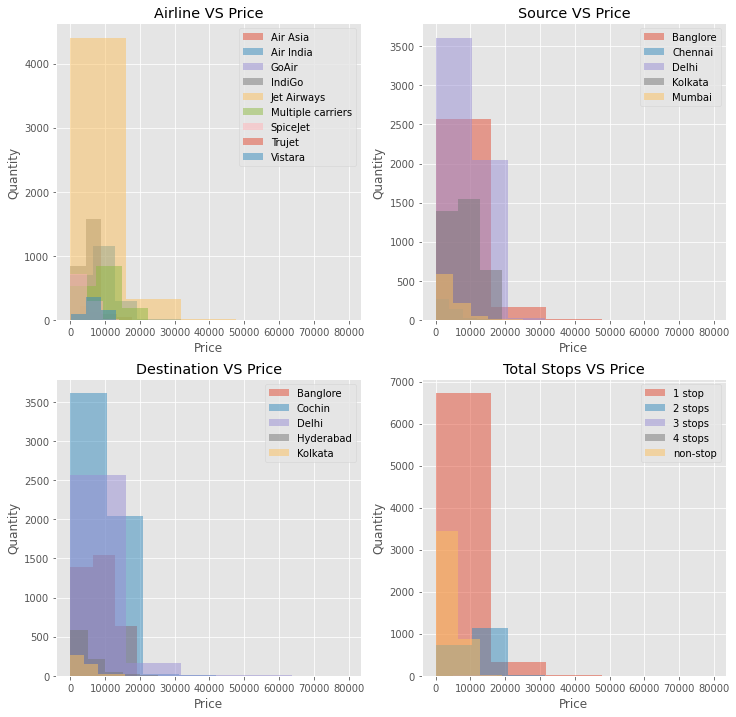

In [ ]:
fig=plt.figure(figsize=(12,12))

fig.add_subplot(2,2,1)
data.groupby("Airline")["Price"].hist(legend=True,bins=5,alpha=0.5)
plt.xlabel("Price")
plt.ylabel("Quantity")
plt.title("Airline VS Price")

fig.add_subplot(2,2,2)
data.groupby("Source")["Price"].hist(legend=True,bins=5,alpha=0.5)
plt.xlabel("Price")
plt.ylabel("Quantity")
plt.title("Source VS Price")

fig.add_subplot(2,2,3)
data.groupby('Destination')['Price'].hist(legend=True,bins = 5,alpha = 0.5)
plt.xlabel("Price")
plt.ylabel("Quantity")
plt.title("Destination VS Price")

fig.add_subplot(2,2,4)
data.groupby("Total_Stops")["Price"].hist(legend=True,bins=5,alpha=0.5)
plt.xlabel("Price")
plt.ylabel("Quantity")
plt.title("Total Stops VS Price")

Conclusion- 
In order to find a direct correlation between various parameters and the price of the flight, we chose to visually display the following graphs.
Consequently we concluded :
*   According to the first graph Jet-airways has most of the expensive flights.
*   According to the second graph which shows the Source and Price distribution ,most of the expensive flights depart from Banglore Airport.
*   According to the third graph most of the expensive flights land in Delhi Airport, and least of them land in Kolkata.
*   According to the 4th graph most of the expensive flights have one stop route.






In [ ]:
data.isna().sum()

Airline            0
Date               0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [ ]:
data.dropna(inplace=True)

In [ ]:
data['Duration'] = (data['Duration'].str.replace("h", "*60").str.replace(' ',"+").str.replace('m',"*1").apply(eval))/60

In [ ]:
data["Date"] = data["Date"].apply(lambda name: name.split("/")[1])

In [ ]:
data.head()

,Airline,Date,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,03,Banglore,Delhi,"BLR , DEL",22:20,01:10 22 Mar,2.833333,non-stop,No info,3897.0
1,Air India,05,Kolkata,Banglore,"CCU , IXR , BBI , BLR",05:50,13:15,7.416667,2 stops,No info,7662.0
2,Jet Airways,06,Delhi,Cochin,"DEL , LKO , BOM , COK",09:25,04:25 10 Jun,19.000000,2 stops,No info,13882.0
3,IndiGo,05,Kolkata,Banglore,"CCU , NAG , BLR",18:05,23:30,5.416667,1 stop,No info,6218.0
4,IndiGo,03,Banglore,Delhi,"BLR , NAG , DEL",16:50,21:35,4.750000,1 stop,No info,13302.0


Date
03    AxesSubplot(0.125,0.125;0.775x0.755)
04    AxesSubplot(0.125,0.125;0.775x0.755)
05    AxesSubplot(0.125,0.125;0.775x0.755)
06    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Price, dtype: object

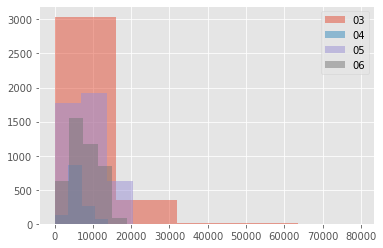

In [ ]:
data.groupby("Date")["Price"].hist(legend=True,bins=5,alpha=0.5)

Conclusions:
*   Flights in March are more expensive than other months




/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Duration vs Price')

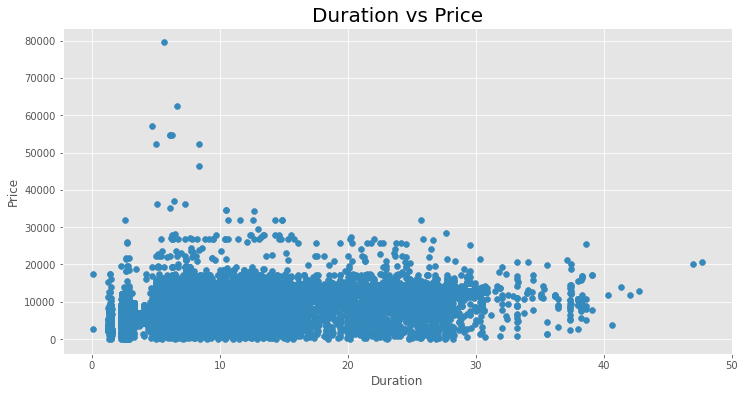

In [ ]:
plt.figure(figsize=(12,6))
sns.scatterplot(data["Duration"], data["Price"])
plt.scatter(data["Duration"], data["Price"])
plt.title('Duration vs Price', size=20)


conclusion-

* It can be seen from the graph that the ratio between the price of flights and the distance is that when the flight time is between 0 and 30 hours the price remains between 0 to 20,000 rupees. From this it can be concluded that the DURATION column can not directly reflect our flight price



In [ ]:
data_class= data.copy()

In [ ]:
data_cluster = data[["Airline",	"Source",	"Destination","Price"]].copy()

In [ ]:
data_cluster=pd.get_dummies(data_cluster)

In [ ]:
data_cluster.head()

,Price,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,3897.0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
1,7662.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
2,13882.0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0
3,6218.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
4,13302.0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0


In [ ]:
scaler = MinMaxScaler()
data_cluster = pd.DataFrame(scaler.fit_transform(data_cluster),columns = data_cluster.columns)

In [ ]:
data_cluster.head()

,Price,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,0.048975,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.096328,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.174558,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.078166,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.167263,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
encoder=LabelEncoder()
data_class["Airline"]=encoder.fit_transform(data_class['Airline'])

In [ ]:
data_class.head()

,Airline,Date,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,3,03,Banglore,Delhi,"BLR , DEL",22:20,01:10 22 Mar,2.833333,non-stop,No info,3897.0
1,1,05,Kolkata,Banglore,"CCU , IXR , BBI , BLR",05:50,13:15,7.416667,2 stops,No info,7662.0
2,4,06,Delhi,Cochin,"DEL , LKO , BOM , COK",09:25,04:25 10 Jun,19.000000,2 stops,No info,13882.0
3,3,05,Kolkata,Banglore,"CCU , NAG , BLR",18:05,23:30,5.416667,1 stop,No info,6218.0
4,3,03,Banglore,Delhi,"BLR , NAG , DEL",16:50,21:35,4.750000,1 stop,No info,13302.0


In [ ]:
data_class = pd.get_dummies(data_class,columns=['Date','Source','Destination','Total_Stops','Additional_Info'])

In [ ]:
for i in range(6):
    data_class[f"Route_{i+1}"]=data_class['Route'].str.split(',').str[i]
    data_class[f"Route_{i+1}"].fillna("None",inplace=True)
    data_class[f"Route_{i+1}"]=encoder.fit_transform(data_class[f"Route_{i+1}"])

data_class.head()

,Airline,Route,Dep_Time,Arrival_Time,Duration,Price,Date_03,Date_04,Date_05,Date_06,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Total_Stops_1 stop,Total_Stops_2 stops,Total_Stops_3 stops,Total_Stops_4 stops,Total_Stops_non-stop,Additional_Info_1 Long layover,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight,Route_1,Route_2,Route_3,Route_4,Route_5,Route_6
0,3,"BLR , DEL",22:20,01:10 22 Mar,2.833333,3897.0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,13,30,13,5,1
1,1,"CCU , IXR , BBI , BLR",05:50,13:15,7.416667,7662.0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,2,25,1,3,5,1
2,4,"DEL , LKO , BOM , COK",09:25,04:25 10 Jun,19.000000,13882.0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,3,32,4,5,5,1
3,3,"CCU , NAG , BLR",18:05,23:30,5.416667,6218.0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,2,34,3,13,5,1
4,3,"BLR , NAG , DEL",16:50,21:35,4.750000,13302.0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,34,8,13,5,1


In [ ]:
data_class.drop(columns="Route", inplace=True)

In [ ]:
data_class.head()

,Airline,Dep_Time,Arrival_Time,Duration,Price,Date_03,Date_04,Date_05,Date_06,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Total_Stops_1 stop,Total_Stops_2 stops,Total_Stops_3 stops,Total_Stops_4 stops,Total_Stops_non-stop,Additional_Info_1 Long layover,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight,Route_1,Route_2,Route_3,Route_4,Route_5,Route_6
0,3,22:20,01:10 22 Mar,2.833333,3897.0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,13,30,13,5,1
1,1,05:50,13:15,7.416667,7662.0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,2,25,1,3,5,1
2,4,09:25,04:25 10 Jun,19.000000,13882.0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,3,32,4,5,5,1
3,3,18:05,23:30,5.416667,6218.0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,2,34,3,13,5,1
4,3,16:50,21:35,4.750000,13302.0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,34,8,13,5,1


In [ ]:
data_class.loc[data_class["Price"] <7000 ,"Price"] = 1
data_class.loc[(data_class["Price"] >= 7000) & (data_class["Price"] < 14000), "Price"] = 2
data_class.loc[data_class["Price"] > 14000 ,"Price"] = 3
data_class.head()

,Airline,Dep_Time,Arrival_Time,Duration,Price,Date_03,Date_04,Date_05,Date_06,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Total_Stops_1 stop,Total_Stops_2 stops,Total_Stops_3 stops,Total_Stops_4 stops,Total_Stops_non-stop,Additional_Info_1 Long layover,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight,Route_1,Route_2,Route_3,Route_4,Route_5,Route_6
0,3,22:20,01:10 22 Mar,2.833333,1.0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,13,30,13,5,1
1,1,05:50,13:15,7.416667,2.0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,2,25,1,3,5,1
2,4,09:25,04:25 10 Jun,19.000000,2.0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,3,32,4,5,5,1
3,3,18:05,23:30,5.416667,1.0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,2,34,3,13,5,1
4,3,16:50,21:35,4.750000,2.0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,34,8,13,5,1


In [ ]:
data_class.drop(columns = ["Dep_Time","Arrival_Time","Duration"], inplace=True)

In [ ]:
x = data_class.drop(columns=["Price"])
y = data_class["Price"]
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.25)
data_class.head()

,Airline,Price,Date_03,Date_04,Date_05,Date_06,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Total_Stops_1 stop,Total_Stops_2 stops,Total_Stops_3 stops,Total_Stops_4 stops,Total_Stops_non-stop,Additional_Info_1 Long layover,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight,Route_1,Route_2,Route_3,Route_4,Route_5,Route_6
0,3,1.0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,13,30,13,5,1
1,1,2.0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,2,25,1,3,5,1
2,4,2.0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,3,32,4,5,5,1
3,3,1.0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,2,34,3,13,5,1
4,3,2.0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,34,8,13,5,1


##**PART IV- Modeling**

In [ ]:
measures = {
    "K":range(2,11),
    "SSE_data":[],
    }
for k in measures["K"]:
    kmeans = KMeans(n_clusters = k ,init = 'k-means++')
    kmeans.fit(data_cluster)
    measures["SSE_data"].append(kmeans.inertia_)
measures = pd.DataFrame(measures)

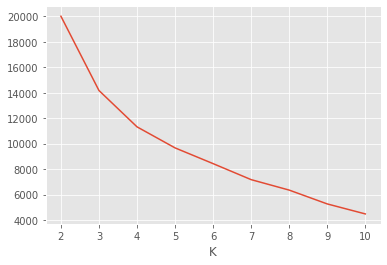

In [ ]:
measures.set_index("K", inplace=True)
measures["SSE_data"].plot()

In [ ]:
kmeans = KMeans(n_clusters = 4 ,init = 'k-means++')
kmeans.fit(data_cluster)
metrics.silhouette_score(data_cluster,kmeans.labels_)

0.5136801414733594

It can be seen from the "elbow" method that there is no unequivocal determination as to the number of clusters to be divided. The significant fractions in the graph are 3 and 4, so we used the silhouette model to determine the best number of clusters which is 4.

In [ ]:
forest = RandomForestClassifier(n_estimators = 25)
forest.fit(x_train,y_train)
y_pred = forest.predict(x_test)


##**V- Evaluation**

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
metrics.confusion_matrix(y_test, y_pred)


Accuracy: 0.7756813417190775


array([[1233,  288,   56],
       [ 192, 1112,  100],
       [  13,  100,  245]])

The confusion matrix shows the number of times the algorithm correctly and incorrectly classified the test group according to prices.
It can be seen that the algorithm was right 1190 times by correctly tagging the price group as 1.
Wrong 304 times by tagging price group 1 as price group 2.
Mistaken 58 times by tagging price group 1 as price group 3.
For group 2, the algorithm correctly tagged 1156 times as price group 2, erred 175 times by tagging as price group 1 and 89 times erred in tagging as group 3.
As for Group 3, he was right by tagging 237 times as Group 3, 17 times by tagging as Group 1, and 113 times by tagging as group 2.

In [ ]:
data_importance=pd.DataFrame({"column": x.columns,
                         "Importance":forest.feature_importances_ })
data_importance

,column,Importance
0,Airline,0.268062
1,Date_03,0.031696
2,Date_04,0.020791
3,Date_05,0.023340
4,Date_06,0.019445
5,Source_Banglore,0.005105
6,Source_Chennai,0.000386
7,Source_Delhi,0.006295
8,Source_Kolkata,0.004022
9,Source_Mumbai,0.004607


In [ ]:
data_importance.iloc[[data_importance['Importance'].idxmax()]]["column"].values[0]

'Airline'

According to the Classification model we checked the level of accuracy and found that the algorithm is accurate.Than we checked what is the most important column and found that the main effect on flights price is the Airline company.
Therefore it can be concluded that we can predict the price by analyzing the given data.

In [ ]:
data_cluster["Cluster"] = kmeans.labels_

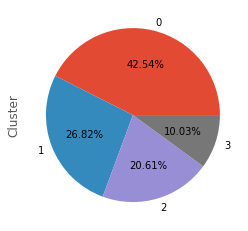

In [ ]:
data_cluster["Cluster"].value_counts().plot(kind = "pie", autopct= "%1.2f%%")

In [ ]:
data_cluster.groupby("Cluster")["Price"].mean()

Cluster
0    0.117427
1    0.103699
2    0.092308
3    0.061669
Name: Price, dtype: float64

In [ ]:
 data_cluster.groupby("Cluster")["Price"].max()

Cluster
0    0.65756
1    0.40174
2    1.00000
3    0.31614
Name: Price, dtype: float64

In [ ]:
 data_cluster.groupby("Cluster")["Price"].min()

Cluster
0    0.000032
1    0.000000
2    0.000225
3    0.000445
Name: Price, dtype: float64

Cluster
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
3    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Price, dtype: object

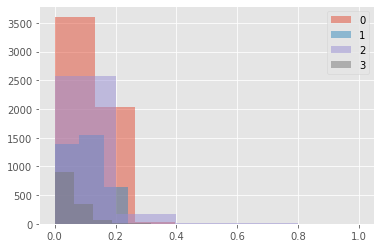

In [ ]:
data_cluster.groupby("Cluster")["Price"].hist(legend=True,bins=5,alpha=0.5)

conclusion-

*   The cluster with the highest price is cluster 2
*   The cluster with the lowest price is cluster 3



In [ ]:
data_cluster.corr()

,Price,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Cluster
Price,1.000000,-0.109770,0.040645,-0.072624,-0.285405,0.350047,0.098706,-0.236032,-0.007541,-0.050371,-0.092985,-0.136679,0.212687,0.007470,-0.185223,0.007470,0.212687,-0.092985,-0.185223,-0.136679,-0.279985
Airline_Air Asia,-0.109770,1.000000,-0.078357,-0.023927,-0.086217,-0.131502,-0.064301,-0.051024,-0.001531,-0.038795,0.029722,-0.033256,-0.063864,0.084168,-0.047062,0.084168,-0.063864,0.029722,-0.047062,-0.033256,0.008000
Airline_Air India,0.040645,-0.078357,1.000000,-0.059938,-0.215983,-0.329424,-0.161080,-0.127819,-0.003834,-0.097184,-0.019275,-0.049906,-0.000064,0.023927,0.025319,0.023927,-0.000064,-0.019275,0.025319,-0.049906,-0.013099
Airline_GoAir,-0.072624,-0.023927,-0.059938,1.000000,-0.065951,-0.100591,-0.049187,-0.039030,-0.001171,-0.029676,0.092723,-0.025439,-0.011524,-0.041179,-0.036000,-0.041179,-0.011524,0.092723,-0.036000,-0.025439,0.015818
Airline_IndiGo,-0.285405,-0.086217,-0.215983,-0.065951,1.000000,-0.362472,-0.177240,-0.140641,-0.004219,-0.106934,0.055732,0.132370,-0.073007,-0.056056,0.057726,-0.056056,-0.073007,0.055732,0.057726,0.132370,0.133275
Airline_Jet Airways,0.350047,-0.131502,-0.329424,-0.100591,-0.362472,1.000000,-0.270332,-0.214512,-0.006435,-0.163099,0.004725,-0.139812,-0.028337,0.100645,-0.028555,0.100645,-0.028337,0.004725,-0.028555,-0.139812,-0.048281
Airline_Multiple carriers,0.098706,-0.064301,-0.161080,-0.049187,-0.177240,-0.270332,1.000000,-0.104891,-0.003146,-0.079751,-0.185244,-0.068364,0.422507,-0.220091,-0.096747,-0.220091,0.422507,-0.185244,-0.096747,-0.068364,-0.351114
Airline_SpiceJet,-0.236032,-0.051024,-0.127819,-0.039030,-0.140641,-0.214512,-0.104891,1.000000,-0.002497,-0.063284,0.008721,0.196574,-0.187972,0.060837,0.107668,0.060837,-0.187972,0.008721,0.107668,0.196574,0.217885
Airline_Trujet,-0.007541,-0.001531,-0.003834,-0.001171,-0.004219,-0.006435,-0.003146,-0.002497,1.000000,-0.001898,-0.004409,-0.001627,-0.007447,-0.005239,0.032522,-0.005239,-0.007447,-0.004409,0.032522,-0.001627,0.017196
Airline_Vistara,-0.050371,-0.038795,-0.097184,-0.029676,-0.106934,-0.163099,-0.079751,-0.063284,-0.001898,1.000000,0.108513,0.057270,-0.146779,0.050569,-0.016612,0.050569,-0.146779,0.108513,-0.016612,0.057270,0.126974
